### Library Import

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean

### Input File Read 

In [2]:
data=pd.read_csv("./../data/01_data_mars_opposition.csv")

In [3]:
#data.head()

### Sun Longitude 

In [4]:
mars_heliocentric_longitude=data.iloc[:,3:7]

In [5]:
s=data["ZodiacIndex"].values
degree=data["Degree"].values
minute=data["Minute"].values
seconds=data["Second"].values

In [6]:
mars_heliocentric_longitude_in_degree= s*30 +degree + (minute/60) + (seconds/3600)

In [7]:
#mars_heliocentric_longitude_in_degree

In [8]:
mars_heliocentric_longitude_in_radian= mars_heliocentric_longitude_in_degree*math.pi/180.0

In [9]:
#mars_heliocentric_longitude_in_radian

In [10]:
geocentric_latitude=data.iloc[:,7:9]

In [11]:
#geocentric_latitude.head()

In [12]:
#Not Required for First Part
geocentric_latitude_in_radian=(geocentric_latitude["LatDegree"].values * math.pi/180 )+ (geocentric_latitude["LatMinute"].values *math.pi/(60*180.0))

In [13]:
#geocentric_latitude_in_radian

### Average Sun Longitude 

In [14]:
mars_mean_longitude=data.iloc[:,9:13]

In [15]:
#mars_mean_longitude.columns

In [16]:
s_mean=mars_mean_longitude["ZodiacIndexAverageSun"].values
degree_mean=mars_mean_longitude["DegreeMean"].values
minute_mean=mars_mean_longitude["MinuteMean"].values
seconds_mean=mars_mean_longitude["SecondMean"].values

In [17]:
mars_mean_longitude_in_degree=s_mean*30 +degree_mean + (minute_mean/60) + (seconds_mean/3600.0)

In [18]:
mars_mean_longitude_in_radian=mars_mean_longitude_in_degree*math.pi/180

In [19]:
#mars_mean_longitude_in_radian

### Optimization 

In [20]:
alpha=mars_mean_longitude_in_radian
beta=mars_heliocentric_longitude_in_radian

In [21]:
def loss_function(params,args):
    x_list=[]
    y_list=[]
    r_list=[]
    a=params[0]
    b=params[1]
    alpha=args[0]
    beta=args[1]
    for i in range(len(data)):
        x=((-1-a)*np.sin(b) + (a*np.tan(alpha[i]) + np.tan(beta[i]))*np.cos(b))/(np.tan(alpha[i]) - np.tan(beta[i]))
        y=a*np.sin(b) + (np.tan(alpha[i])* (x - a*np.cos(b)))
        #print(x)
        r=np.sqrt(x**2 + y**2)
        x_list.append(x)
        y_list.append(y)
        r_list.append(r)
    #print(x_list)   
    ap=np.mean(r_list)
    gp=gmean(r_list)
    
    #print((math.log(ap,10) - math.log(gp,10)))
    return (math.log(ap,10) - math.log(gp,10))

In [22]:
def loss_function_variance(params,args):
    x_list=[]
    y_list=[]
    r_list=[]
    a=params[0]
    b=params[1]
    alpha=args[0]
    beta=args[1]
    for i in range(len(data)):
        x=((-1-a)*np.sin(b) + (a*np.tan(alpha[i]) + np.tan(beta[i]))*np.cos(b))/(np.tan(alpha[i]) - np.tan(beta[i]))
        y=a*np.sin(b) + (np.tan(alpha[i])* (x - a*np.cos(b)))
        #print(x)
        r=np.sqrt(x**2 + y**2)
        x_list.append(x)
        y_list.append(y)
        r_list.append(r)
    #print(x_list)   
    var=np.var(r_list)
    
    #print((math.log(ap,10) - math.log(gp,10)))
    return var

In [23]:
def optimizer(function,method_name,alpha,beta):
    
    
    a=[1.2]
    b=[0.2]
    initial_parameters = np.array(a+b) #Random Values
    #bound to avoid case of global Minima where i am getting Loss = 0
    bounds = [(0.1, np.inf) for _ in a] + [(-np.inf, np.inf)]
    
    parameters = minimize(function, initial_parameters,
                      args=[alpha,
                            beta
                            ],
                      method=method_name,bounds=bounds)
    #optimized_params, loss = parameters['x'], parameters['fun']
    #print(optimized_params1)
    #print(squared_error_loss1)
    return parameters['x'], parameters['fun']

### log(AM) -log(GM) Loss Function 

In [24]:
print("Optimizing Parameters .... ")
function_name=loss_function
optimized_params, loss= optimizer(function_name,'L-BFGS-B',alpha,beta)
print("Optimized Parameters Computed")

Optimizing Parameters .... 
Optimized Parameters Computed


In [25]:
optimized_params

array([ 0.96767762, -0.5432288 ])

In [26]:
print("Optimized Parameters = " + str(optimized_params))

Optimized Parameters = [ 0.96767762 -0.5432288 ]


In [27]:
print("Loss = " + str(loss))

Loss = 0.0017796207577609469


### Testing of Result  (AM-GM)

In [28]:
#Plot to Check if Circle type structure is formed or not
a=optimized_params[0]
b=optimized_params[1]
x_list=[]
y_list=[]
r_list=[]
for i in range(len(data)):
        x=((-1-a)*np.sin(b) + (a*np.tan(alpha[i]) + np.tan(beta[i]))*np.cos(b))/(np.tan(alpha[i]) - np.tan(beta[i]))
        y=a*np.sin(b) + (np.tan(alpha[i])* (x - a*np.cos(b)))
        #print(x)
        r=np.sqrt(x**2 + y**2)
        x_list.append(x)
        y_list.append(y)
        r_list.append(r)

In [29]:
print("Radius = " + str(np.mean(r_list)))

Radius = 10.953094596498573


In [31]:
x_list

[-5.099125412244697,
 2.4748039245894144,
 8.29665817335326,
 10.865488234653933,
 8.263567219970254,
 -0.28058990192180233,
 -9.213484474969455,
 -10.3446820843133,
 -0.3768849383289791,
 6.320350201574605,
 10.880012857040603,
 10.004712014156167]

In [32]:
y_list

[-9.230529465133495,
 -10.429036074474151,
 -6.73671735132627,
 -0.3610149163830578,
 6.75733518989351,
 10.547867826737999,
 3.1894604740708647,
 -9.848212753085702,
 -10.60613995991022,
 -8.462092528051805,
 -3.1947247918110637,
 4.176054673409928]

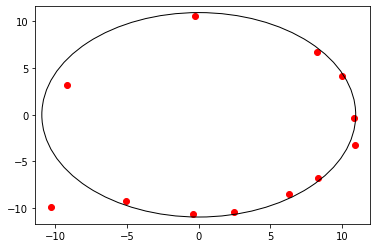

In [30]:
import matplotlib.pyplot as plt
circle1 = plt.Circle((0, 0), np.mean(r_list),fill=False)
fig, ax = plt.subplots()
ax.add_artist(circle1)
plt.scatter(x_list,y_list,color='red')
plt.show()